In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [12]:
df=pd.read_csv('T1.csv')

In [13]:
df 

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [14]:
df.info

<bound method DataFrame.info of               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113 

In [15]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [16]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [17]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
df.set_index('Date/Time', inplace=True)

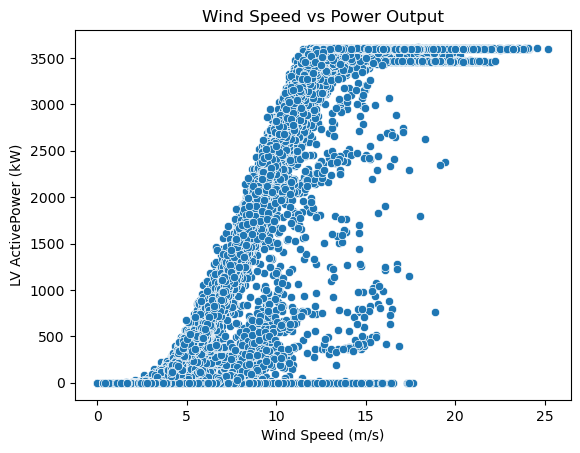

In [18]:
sns.scatterplot(data=df, x='Wind Speed (m/s)', y='LV ActivePower (kW)')
plt.title('Wind Speed vs Power Output')
plt.show()

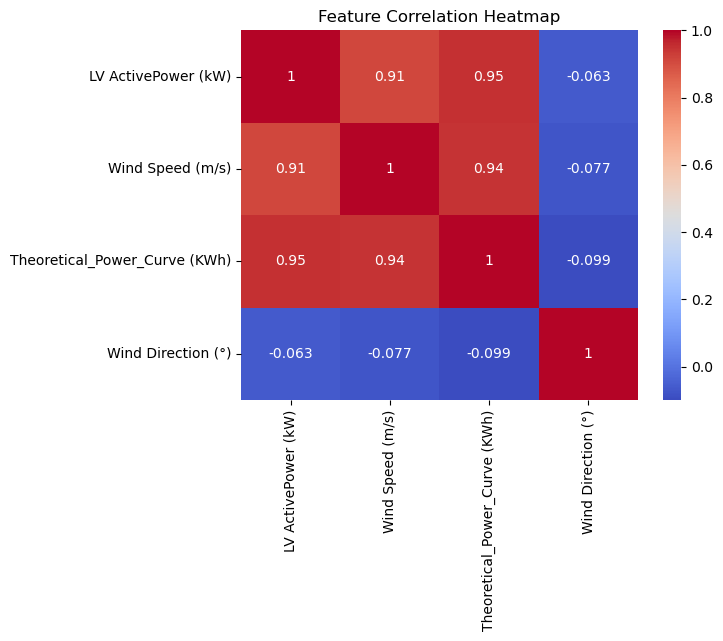

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9006599245385882
RMSE: 411.7100216966853


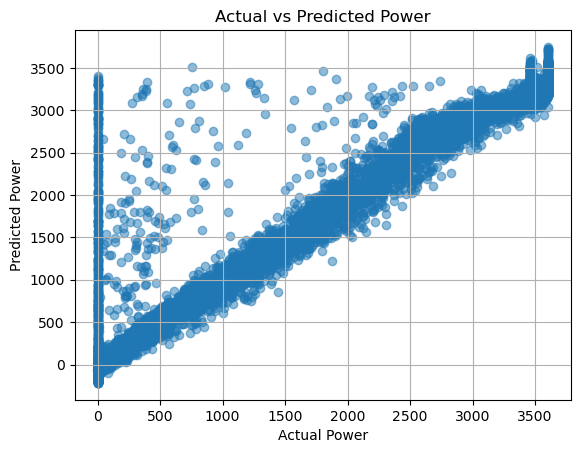

In [23]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs Predicted Power")
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 411.7100216966853


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 188.75221227147605
Root Mean Squared Error (RMSE): 411.7100216966853
R² Score: 0.9006599245385882
